## Stochastic Gradient Descent For Linear Regression

In [0]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import random
from sklearn.model_selection import train_test_split

In [0]:
class MySGDClassifier():
    def __init__(self,sample_size,iterations):
        self._sample_size=sample_size
        self._iterations=iterations
        self._coefficients=0
        self._intercept=0
            
    def find_minima(self,d_train):
        self._coefficients=np.array([random.uniform(-2,2) for _ in range(1,d_train.shape[1])],ndmin=2)
        self._intercept=0
            
        for itr in range(self._iterations):
          
            tr_data=d_train.sample(self._sample_size,random_state=itr,axis=0)
            x=np.array(tr_data.drop('price',axis=1))
            y=np.array(tr_data['price'])
           
            const=(2/x.shape[0])
            temp_w=np.zeros(shape=(1,13))
            temp_b=0
            
            for i in range(1,self._sample_size):
              y_hat_i=np.dot(self._coefficients,x[i].T)+self._intercept
              temp_w+=(y[i]-y_hat_i) *(x[i])
              temp_b+=(y[i]-y_hat_i)
           
          
            temp_w*=(-2/self._sample_size)
            temp_b*=(-2/self._sample_size)
            self._coefficients=(self._coefficients-(0.12*temp_w))
            self._intercept=(self._intercept-(0.12*temp_b))              
 
      
    def make_predictions(self,d_test):
         return np.dot(d_test, self._coefficients.T)+self._intercept 
  
    def plot_actual_vs_pred(self,test_pred,y_test):
        plt.figure(1,figsize=(8,5)) 
        plt.scatter(y_test,test_pred)
        plt.xlabel("Actual Cost")
        plt.ylabel("Predicted Cost")
        plt.title("Actual vs Predicted Cost For Test Data")
        plt.show()
        print("+"*30)
        print("MSE                   : ",mean_squared_error(y_test, test_pred))
        print("Weights/Coeffiecients : ", self._coefficients)
        print("Intercept             : ",self._intercept)
        print("+"*30)

In [0]:
b_data=pd.DataFrame(data=load_boston().data)
target=load_boston().target
d_tr,d_test, y_tr, y_test=train_test_split(b_data, target, test_size=0.33, random_state=5)

In [0]:
# Standardizing the data so that performance of SGD will increase i.e it will converge fast
std=StandardScaler()
std_tr_data=std.fit_transform(d_tr)
std_test_data=std.transform(d_test)

In [0]:
d_train1=pd.DataFrame(data=std_tr_data)
d_train1['price']=y_tr

In [0]:
def compute_all(d_train,test_data,y_test,iterations,sample_size):
    my_sgd=MySGDClassifier(sample_size,iterations)
    my_sgd.find_minima(d_train1)
    test_pred=my_sgd.make_predictions(test_data)
    my_sgd.plot_actual_vs_pred(test_pred,y_test)

#### Training and testing against Test dataset with 30 iterations

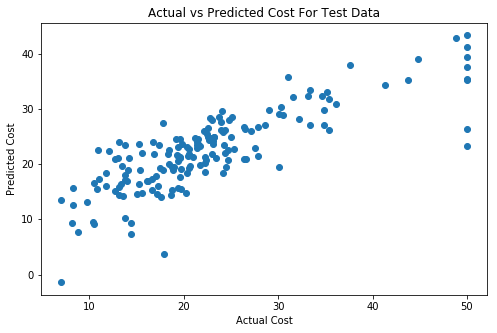

++++++++++++++++++++++++++++++
MSE                   :  31.37739211304358
Weights/Coeffiecients :  [[-1.00717852  0.21603858 -0.18299627  0.3492509  -1.02392846  3.49561218
   0.03307049 -2.9516795   1.58864193  0.01315107 -2.15431507  1.08253157
  -2.70573371]]
Intercept             :  [22.83713775]
++++++++++++++++++++++++++++++


In [203]:
compute_all(d_train1,std_test_data,y_test,iterations=40,sample_size=30)

#### Training and testing against Test dataset with 70 iterations

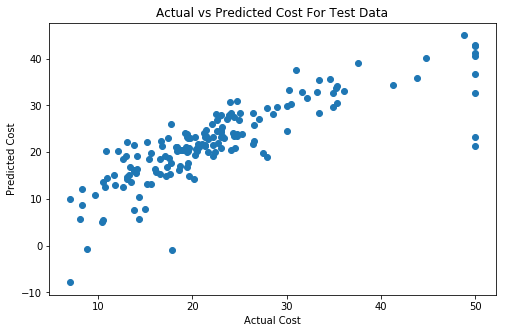

++++++++++++++++++++++++++++++
MSE                   :  30.25319101848719
Weights/Coeffiecients :  [[-1.68588636  0.76870825 -0.10629362  0.1270256  -0.90590217  3.63550199
   0.1133121  -2.5774426   2.26615579 -1.30404873 -2.40256347  1.38085018
  -2.77010962]]
Intercept             :  [22.71648945]
++++++++++++++++++++++++++++++


In [202]:
compute_all(d_train1,std_test_data,y_test,iterations=50,sample_size=30)

#### Training and testing against Test dataset with 100 iterations

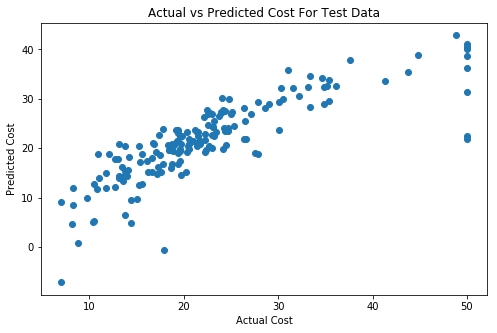

++++++++++++++++++++++++++++++
MSE                   :  29.79079487504899
Weights/Coeffiecients :  [[-1.44396186  0.6059506  -0.09184959  0.01220607 -1.19700039  3.1638696
  -0.11701379 -2.72942825  2.25736475 -1.53717416 -2.29540154  1.17211594
  -3.13460826]]
Intercept             :  [22.27095764]
++++++++++++++++++++++++++++++


In [201]:
compute_all(d_train1,std_test_data,y_test,iterations=100,sample_size=30)

### SGDRegressor Using sklearn 

In [0]:
t_data=pd.DataFrame(data=load_boston().data)
target=load_boston().target
d_tr,d_test, y_tr, y_test=train_test_split(t_data, target, test_size=0.33, random_state=5)

In [0]:
# Standardizing the data so that performance of SGD will increase i.e it will converge fast
std=StandardScaler()
std_tr_data=std.fit_transform(d_tr)
std_test_data=std.transform(d_test)

In [0]:
def print_info(mse,coeff,intercept):
    print("+"*30)
    print("MSE : ",mse)
    print("Weights/Coeffiecients : ",coeff)
    print("Intercept : ",intercept)
    print("+"*30)

In [0]:
def sklearnsSGD(d_tr,y_tr,d_test,y_test,itr=15):
    clf = SGDRegressor(max_iter=itr,random_state=10)
    clf.fit(d_tr, y_tr)
    test_pred=clf.predict(d_test)
    plt.scatter(y_test,test_pred)
    plt.xlabel("Actual Cost")
    plt.ylabel("Predicted Cost")
    plt.title("Actual vs Predicted Cost For Test Data")
    plt.show()
    return mean_squared_error(y_tr, clf.predict(d_tr)),clf.coef_,clf.intercept_

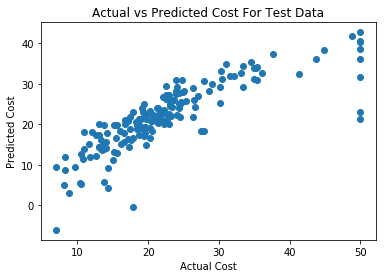

++++++++++++++++++++++++++++++
MSE :  19.886552442640202
Weights/Coeffiecients :  [-1.14213423  0.6729475  -0.52259626  0.26959962 -1.02628079  3.01344071
 -0.45182218 -2.45564735  1.42475077 -0.80957698 -2.02464983  1.01018053
 -3.28711035]
Intercept :  [22.5486766]
++++++++++++++++++++++++++++++


In [139]:
mse,coeff,inter=sklearnsSGD(std_tr_data,y_tr,std_test_data,y_test,itr=30)
print_info(mse,coeff,inter)

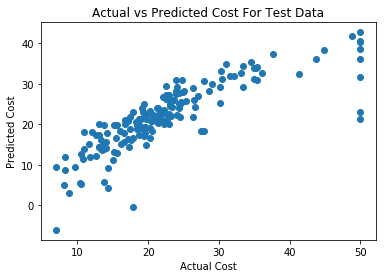

++++++++++++++++++++++++++++++
MSE :  19.886552442640202
Weights/Coeffiecients :  [-1.14213423  0.6729475  -0.52259626  0.26959962 -1.02628079  3.01344071
 -0.45182218 -2.45564735  1.42475077 -0.80957698 -2.02464983  1.01018053
 -3.28711035]
Intercept :  [22.5486766]
++++++++++++++++++++++++++++++


In [140]:
mse,coeff,inter=sklearnsSGD(std_tr_data,y_tr,std_test_data,y_test,itr=70)
print_info(mse,coeff,inter)

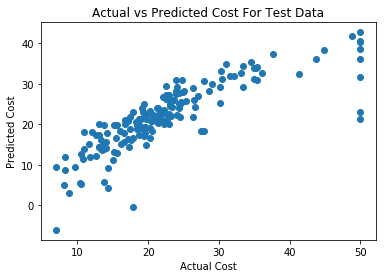

++++++++++++++++++++++++++++++
MSE :  19.886552442640202
Weights/Coeffiecients :  [-1.14213423  0.6729475  -0.52259626  0.26959962 -1.02628079  3.01344071
 -0.45182218 -2.45564735  1.42475077 -0.80957698 -2.02464983  1.01018053
 -3.28711035]
Intercept :  [22.5486766]
++++++++++++++++++++++++++++++


In [141]:
mse,coeff,inter=sklearnsSGD(std_tr_data,y_tr,std_test_data,y_test,itr=100)
print_info(mse,coeff,inter)

## Summary:

In [1]:
print("""
        SGD     | iterations  |           MSE          | 
        ----------------------------------------------------
        MySGD   |    30       |   31.37739211304358    |
        sklearn |    30       |   19.886552442640202   |
        -----------------------------------------------------
        MySGD   |    70       |   30.25319101848719    |
        sklearn |    70       |   19.886552442640202   |
        -----------------------------------------------------
        MySGD   |    100      |   29.79079487504899    |
        sklearn |    100      |   19.886552442640202   |
        -----------------------------------------------------

""")


        SGD     | iterations  |           MSE          | 
        ----------------------------------------------------
        MySGD   |    30       |   31.37739211304358    |
        sklearn |    30       |   19.886552442640202   |
        -----------------------------------------------------
        MySGD   |    70       |   30.25319101848719    |
        sklearn |    70       |   19.886552442640202   |
        -----------------------------------------------------
        MySGD   |    100      |   29.79079487504899    |
        sklearn |    100      |   19.886552442640202   |
        -----------------------------------------------------




## Conclusion:

1. SGD is iterative algorithm i.e with each iteration over training data we are trying to find best weight vector with which our loss functions gives minimum value.
2. SGD basically uses update function to reach or  make step by step progress towards minima.
3. Learning rate is our hyper-parameter in case of SGD as it decides the step sizes.
4. If learning rate is two low our model will make very small progress towards minimum and may halt before or at local minima.
5. If it too large we may crossover minima
6. So best thing is to do is reduce the learning rate on each iteration for first few iteration it better be huge reduction so that we surpasses the local mimima.
7. In the dataset which we have choosen that is Boston House Prices dataset here our number of datapoints were less but in case of huge datasets it is will be very costly to do summation over all datapoints for each update so we are using random K no of datapoints for each iteration such a way that n>=k>=1.
8. That will make SGD very fast and computationally efficient.